In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime
import warnings
import os
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set_palette('Set2')



## Data Loading and Initial Exploration

In [2]:
# Go one folder back and then access the data folder
base_path = os.path.join(os.path.dirname(os.getcwd()), "data")
reviews_path = os.path.join(base_path, "yelp_training_set/yelp_training_set_review.json")
business_path = os.path.join(base_path, "yelp_training_set/yelp_training_set_business.json")
user_path = os.path.join(base_path, "yelp_training_set/yelp_training_set_user.json")

# Function to load JSON data
def load_json_data(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

# Load datasets
reviews_df = load_json_data(reviews_path)
business_df = load_json_data(business_path)
users_df = load_json_data(user_path)

print(f"Reviews dataset shape: {reviews_df.shape}")
print(f"Business dataset shape: {business_df.shape}")
print(f"Users dataset shape: {users_df.shape}")



Reviews dataset shape: (229907, 8)
Business dataset shape: (11537, 13)
Users dataset shape: (43873, 6)


### Reviews Dataset Analysis


In [3]:
# Display review dataset structure
print("Reviews dataset columns:")
print(reviews_df.columns.tolist())
reviews_df.head()


Reviews dataset columns:
['votes', 'user_id', 'review_id', 'stars', 'date', 'text', 'type', 'business_id']


,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [4]:
# Basic statistics for reviews
print("Reviews dataset basic statistics:")
reviews_df.describe()


Reviews dataset basic statistics:


,stars
count,229907.000000
mean,3.766723
std,1.217010
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


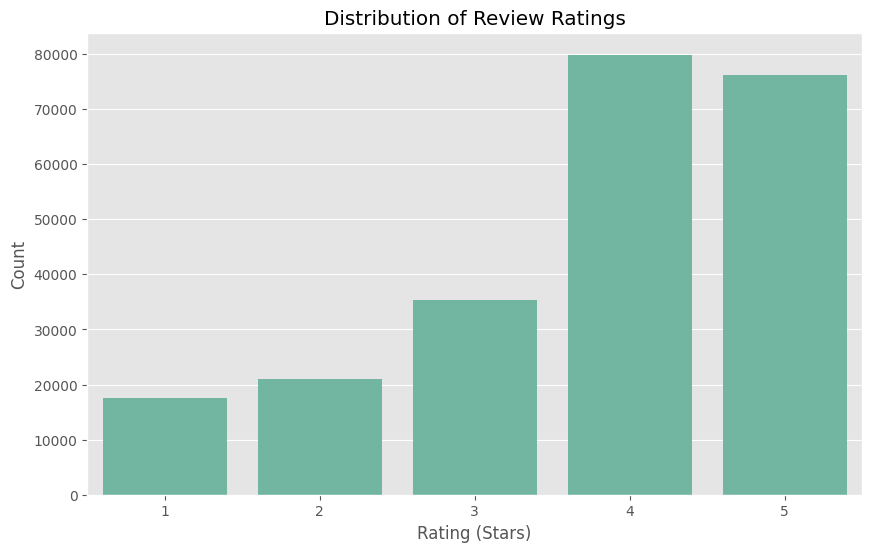

In [5]:
# Convert date to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Distribution of review ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=reviews_df)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.show()


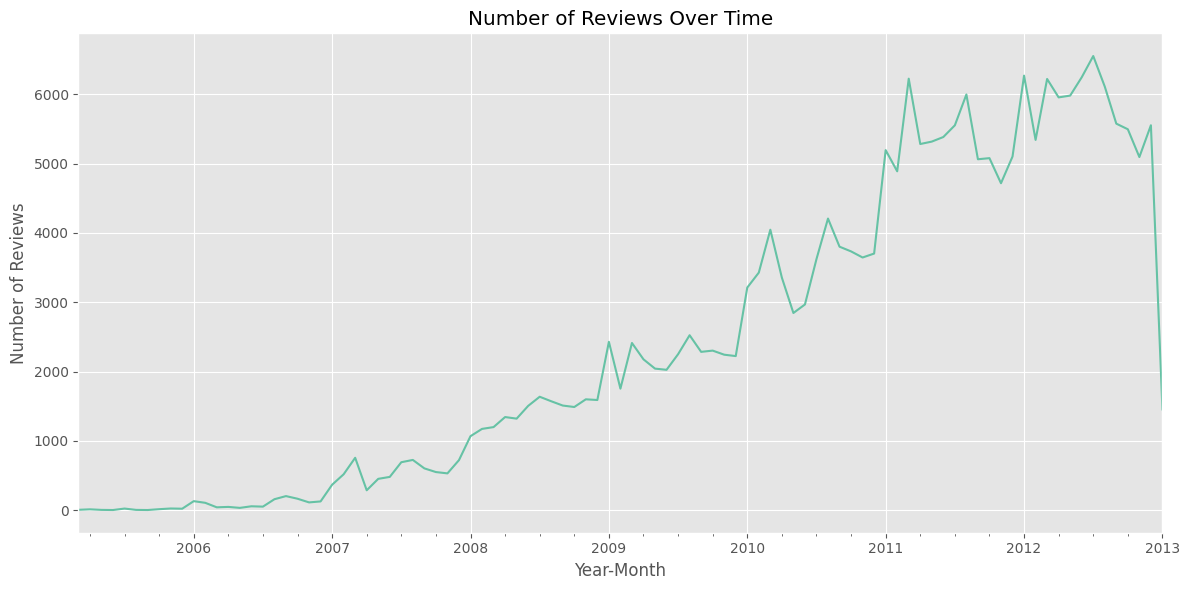

In [7]:
# Reviews over time
reviews_per_month = reviews_df.groupby(reviews_df['date'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
reviews_per_month.plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


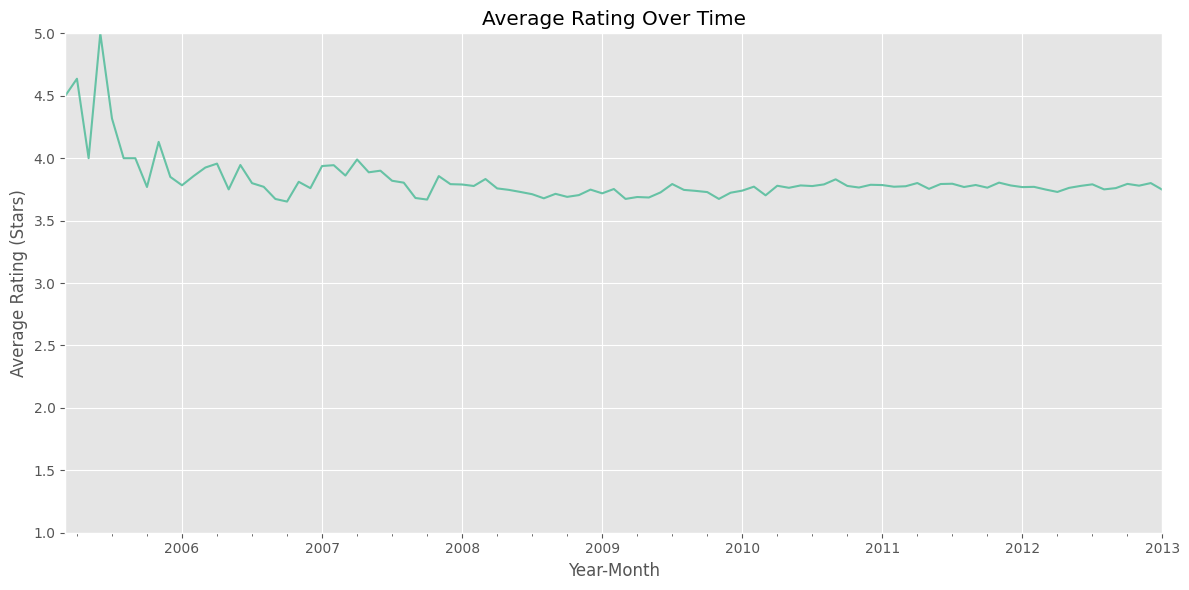

In [8]:
# Average rating over time
avg_rating_per_month = reviews_df.groupby(reviews_df['date'].dt.to_period('M'))['stars'].mean()

plt.figure(figsize=(12, 6))
avg_rating_per_month.plot(kind='line')
plt.title('Average Rating Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Rating (Stars)')
plt.ylim(1, 5)
plt.tight_layout()
plt.show()


### Business Dataset Analysis

In [9]:
# Display business dataset structure
print("Business dataset columns:")
print(business_df.columns.tolist())
business_df.head()


Business dataset columns:
['business_id', 'full_address', 'open', 'categories', 'city', 'review_count', 'name', 'neighborhoods', 'longitude', 'state', 'stars', 'latitude', 'type']


,business_id,full_address,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,type
0,rncjoVoEFUJGCUoC1JgnUA,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",True,"[Accountants, Professional Services, Tax Servi...",Peoria,3,Peoria Income Tax Service,[],-112.241596,AZ,5.0,33.581867,business
1,0FNFSzCFP_rGUoJx8W7tJg,"2149 W Wood Dr\nPhoenix, AZ 85029",True,"[Sporting Goods, Bikes, Shopping]",Phoenix,5,Bike Doctor,[],-112.105933,AZ,5.0,33.604054,business
2,3f_lyB6vFK48ukH6ScvLHg,"1134 N Central Ave\nPhoenix, AZ 85004",True,[],Phoenix,4,Valley Permaculture Alliance,[],-112.073933,AZ,5.0,33.460526,business
3,usAsSV36QmUej8--yvN-dg,"845 W Southern Ave\nPhoenix, AZ 85041",True,"[Food, Grocery]",Phoenix,5,Food City,[],-112.085377,AZ,3.5,33.392210,business
4,PzOqRohWw7F7YEPBz6AubA,"6520 W Happy Valley Rd\nSte 101\nGlendale Az, ...",True,"[Food, Bagels, Delis, Restaurants]",Glendale Az,14,Hot Bagels & Deli,[],-112.200264,AZ,3.5,33.712797,business


In [10]:
# Basic statistics for businesses
print("Business dataset basic statistics:")
business_df.describe()


Business dataset basic statistics:


,review_count,longitude,stars,latitude
count,11537.000000,11537.000000,11537.000000,11537.000000
mean,20.192858,-111.988898,3.674525,33.487833
std,43.345024,0.164932,0.862407,0.133937
min,3.000000,-112.875482,1.000000,32.876848
25%,4.000000,-112.074012,3.000000,33.394031
50%,6.000000,-111.968191,3.500000,33.489668
75%,16.000000,-111.898952,4.500000,33.584409
max,862.000000,-111.263508,5.000000,34.002867


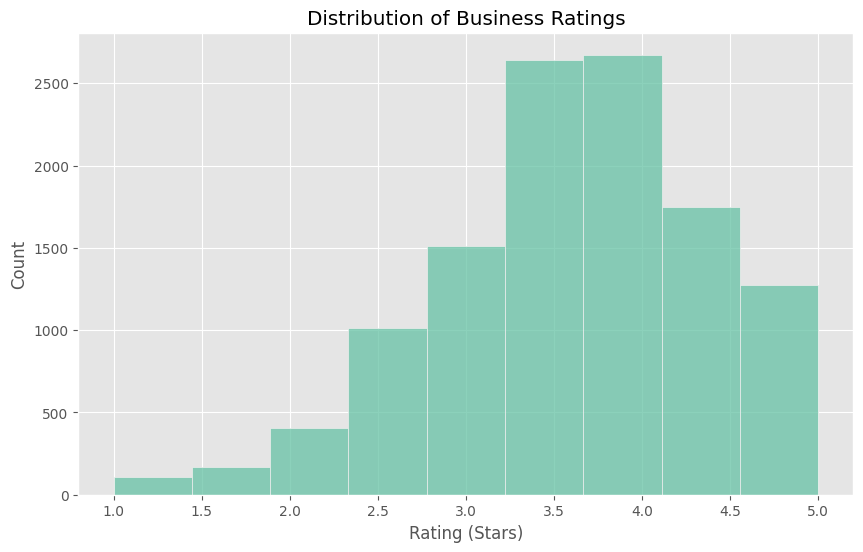

In [11]:
# Distribution of business ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=business_df, x='stars', bins=9)
plt.title('Distribution of Business Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.show()


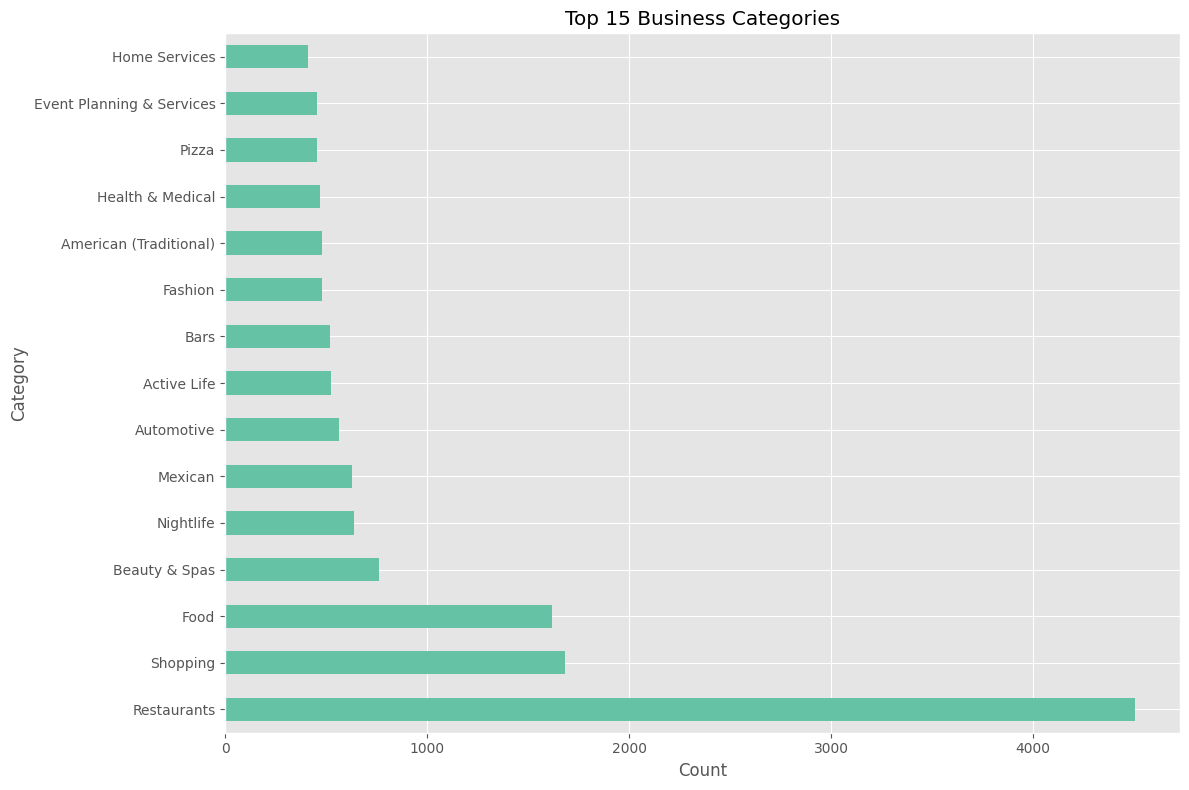

In [13]:
# Top business categories
# Extract and count categories
all_categories = []
for categories in business_df['categories'].dropna():
    if categories:
        all_categories.extend([c.strip() for c in categories])

category_counts = pd.Series(all_categories).value_counts()

plt.figure(figsize=(12, 8))
category_counts[:15].plot(kind='barh')
plt.title('Top 15 Business Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


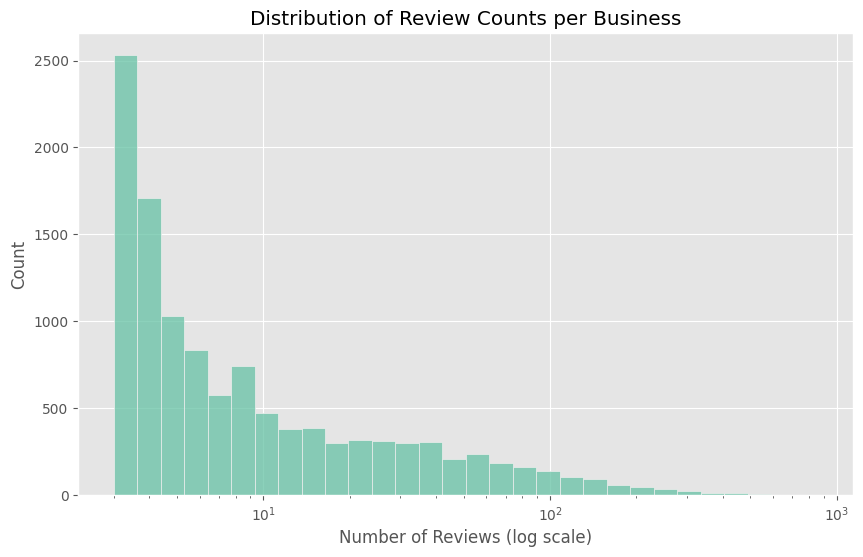

In [14]:
# Business review count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=business_df, x='review_count', bins=30, log_scale=True)
plt.title('Distribution of Review Counts per Business')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Count')
plt.show()

### User Dataset Analysis


In [15]:
# Display user dataset structure
print("User dataset columns:")
print(users_df.columns.tolist())
users_df.head()


User dataset columns:
['votes', 'user_id', 'name', 'average_stars', 'review_count', 'type']


,votes,user_id,name,average_stars,review_count,type
0,"{'funny': 0, 'useful': 7, 'cool': 0}",CR2y7yEm4X035ZMzrTtN9Q,Jim,5.0,6,user
1,"{'funny': 0, 'useful': 1, 'cool': 0}",_9GXoHhdxc30ujPaQwh6Ew,Kelle,1.0,2,user
2,"{'funny': 0, 'useful': 1, 'cool': 0}",8mM-nqxjg6pT04kwcjMbsw,Stephanie,5.0,2,user
3,"{'funny': 0, 'useful': 2, 'cool': 0}",Ch6CdTR2IVaVANr-RglMOg,T,5.0,2,user
4,"{'funny': 0, 'useful': 0, 'cool': 0}",NZrLmHRyiHmyT1JrfzkCOA,Beth,1.0,1,user


In [16]:
# Basic statistics for users
print("User dataset basic statistics:")
users_df.describe()


User dataset basic statistics:


,average_stars,review_count
count,43873.000000,43873.000000
mean,3.744078,38.858729
std,0.965280,117.907082
min,0.000000,1.000000
25%,3.330000,2.000000
50%,3.860000,7.000000
75%,4.360000,23.000000
max,5.000000,5807.000000


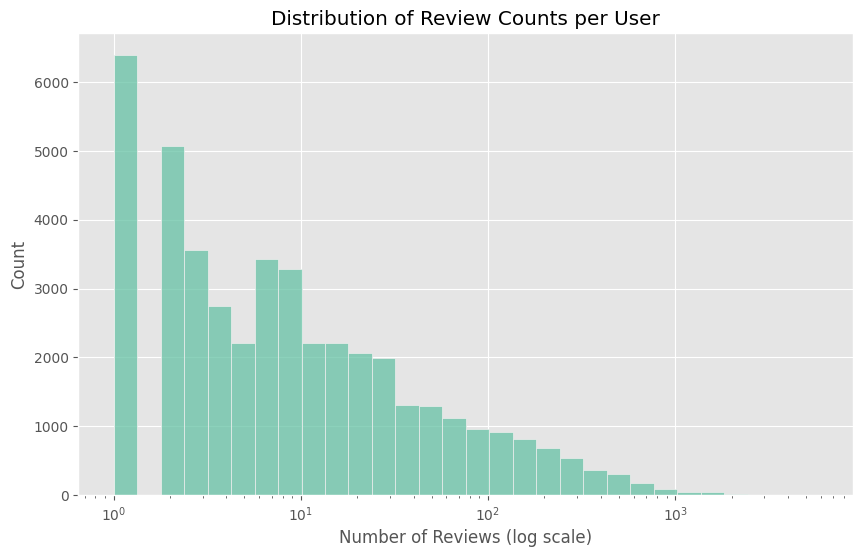

In [17]:
# Distribution of user review counts
plt.figure(figsize=(10, 6))
sns.histplot(data=users_df, x='review_count', bins=30, log_scale=True)
plt.title('Distribution of Review Counts per User')
plt.xlabel('Number of Reviews (log scale)')
plt.ylabel('Count')
plt.show()


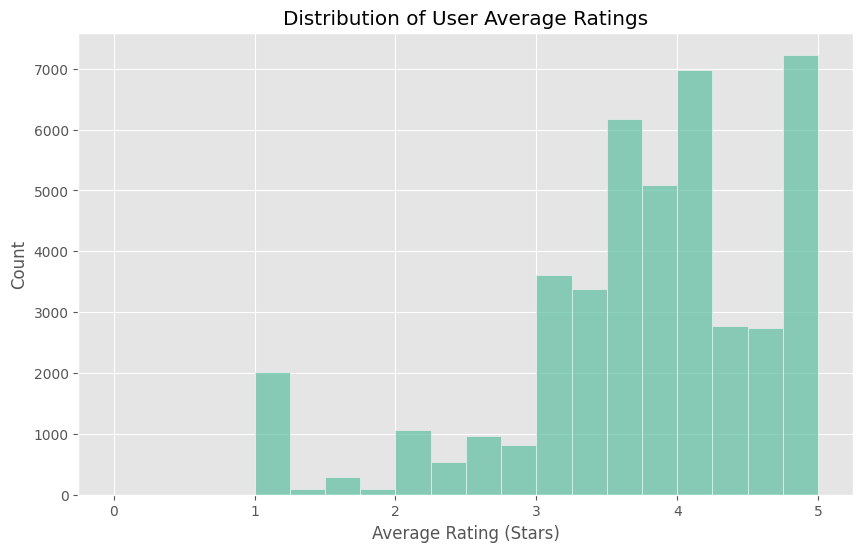

In [18]:
# Distribution of user average stars
plt.figure(figsize=(10, 6))
sns.histplot(data=users_df, x='average_stars', bins=20)
plt.title('Distribution of User Average Ratings')
plt.xlabel('Average Rating (Stars)')
plt.ylabel('Count')
plt.show()


In [26]:
categories = pd.Categorical(users_df['type'])
print(categories)

['user', 'user', 'user', 'user', 'user', ..., 'user', 'user', 'user', 'user', 'user']
Length: 43873
Categories (1, object): ['user']


### Cross-Dataset Analysis


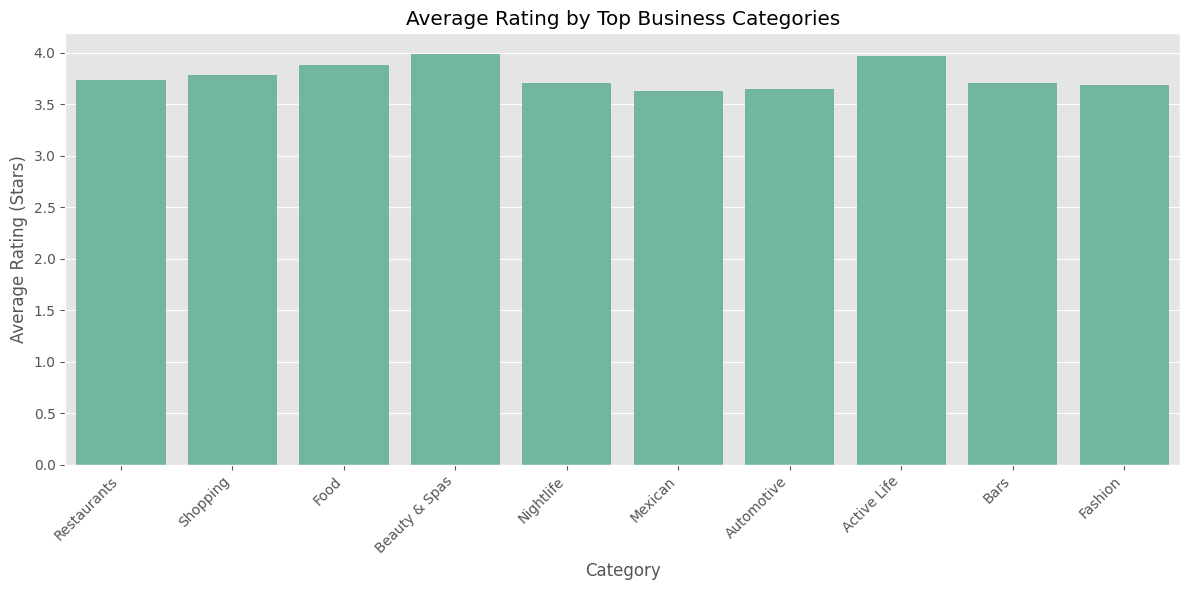

In [ ]:
# Ensure 'categories' column in business_df is a string for filtering
business_df['categories'] = business_df['categories'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Merge reviews with business data
merged_df = reviews_df.merge(business_df[['business_id', 'categories']], on='business_id')

# Analyze ratings by top categories
top_categories = category_counts[:10].index.tolist()

category_ratings = []
for category in top_categories:
    category_reviews = merged_df[merged_df['categories'].str.contains(category, na=False, case=False)]
    avg_rating = category_reviews['stars'].mean()
    category_ratings.append({'Category': category, 'Average Rating': avg_rating, 'Review Count': len(category_reviews)})

category_ratings_df = pd.DataFrame(category_ratings)

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Average Rating', data=category_ratings_df)
plt.title('Average Rating by Top Business Categories')
plt.xlabel('Category')
plt.ylabel('Average Rating (Stars)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Correlation Analysis


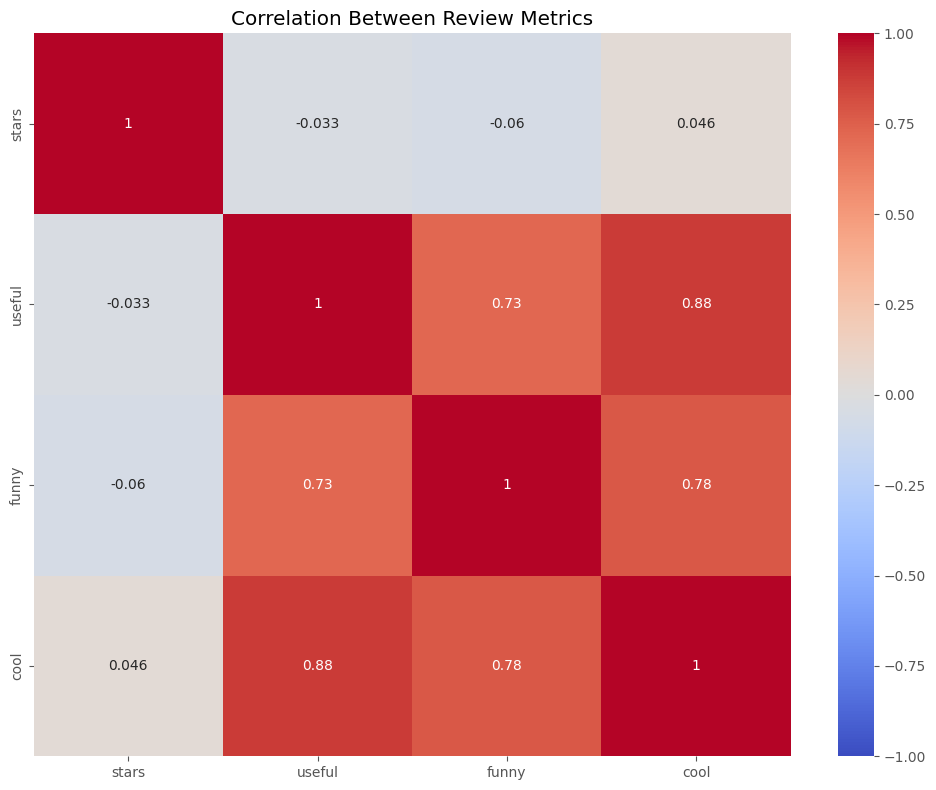

In [31]:
# Extract 'useful', 'funny', and 'cool' from the 'votes' column if they are stored as a dictionary
if 'votes' in reviews_df.columns:
	votes_df = reviews_df['votes'].apply(pd.Series)
	reviews_df = pd.concat([reviews_df, votes_df[['useful', 'funny', 'cool']]], axis=1)

# Ensure the required columns exist before proceeding
if all(col in reviews_df.columns for col in ['stars', 'useful', 'funny', 'cool']):
	# Correlation between review metrics
	correlation_df = reviews_df[['stars', 'useful', 'funny', 'cool']]
	correlation_matrix = correlation_df.corr()

	plt.figure(figsize=(10, 8))
	sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
	plt.title('Correlation Between Review Metrics')
	plt.tight_layout()
	plt.show()
else:
	print("Required columns for correlation analysis are missing.")


### Text Analysis Preview


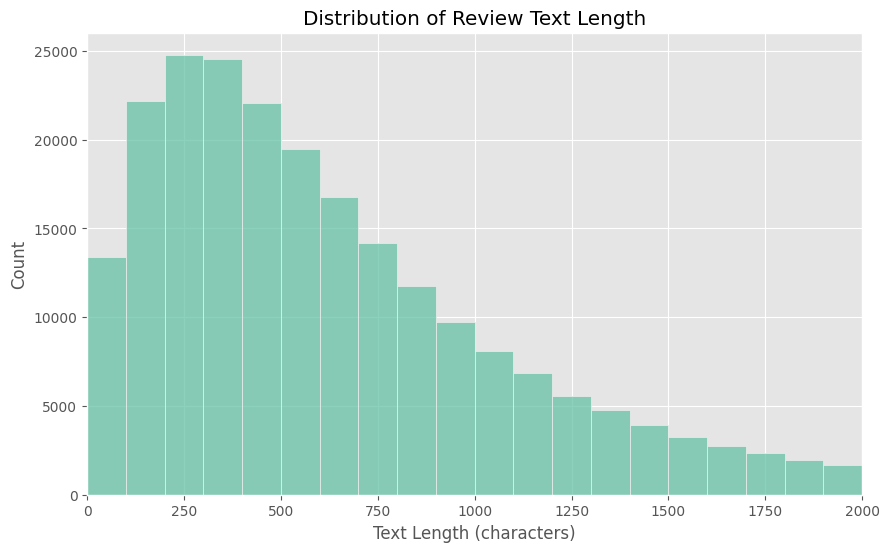

In [32]:
# Basic text analysis of reviews
reviews_df['text_length'] = reviews_df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=reviews_df, x='text_length', bins=50)
plt.title('Distribution of Review Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.xlim(0, 2000)
plt.show()


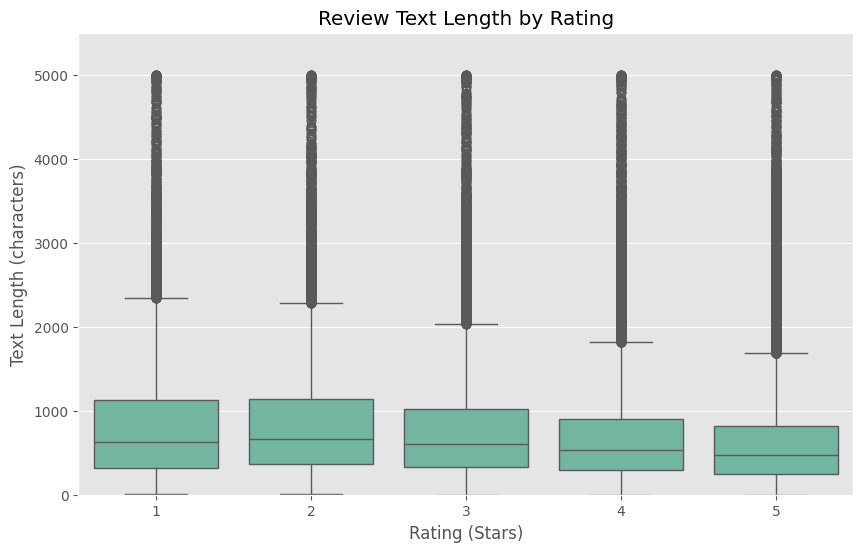

In [36]:
# Correlation between text length and rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='stars', y='text_length', data=reviews_df)
plt.title('Review Text Length by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Text Length (characters)')
plt.ylim(0, 5500)
plt.show()


### Summary Statistics

In [38]:
# Generate summary statistics for all datasets
summary_stats = {
    'reviews': {
        'total_reviews': len(reviews_df),
        'average_stars': reviews_df['stars'].mean(),
        'star_distribution': reviews_df['stars'].value_counts().to_dict()
    },
    'businesses': {
        'total_businesses': len(business_df),
        'average_rating': business_df['stars'].mean(),
        'categories_count': business_df['categories'].str.split(',').str.len().mean()
    },
    'users': {
        'total_users': len(users_df),
        'average_reviews_per_user': users_df['review_count'].mean(),
        'elite_users_percentage': elite_percentage
    }
}

print(json.dumps(summary_stats, indent=4))


{
    "reviews": {
        "total_reviews": 229907,
        "average_stars": 3.766723066283323,
        "star_distribution": {
            "4": 79878,
            "5": 76193,
            "3": 35363,
            "2": 20957,
            "1": 17516
        }
    },
    "businesses": {
        "total_businesses": 11537,
        "average_rating": 3.674525439889053,
        "categories_count": 2.7230649215567304
    },
    "users": {
        "total_users": 43873,
        "average_reviews_per_user": 38.85872860301324,
        "elite_users_percentage": 100.0
    }
}
